In [1]:
from smach_utils_receptionist import *

/home/roboworks/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
res = omni_base.move_base(known_location='beverage_area',timeout=20)
if res:
    voice.talk("I will check if there is coke here")
else:
    voice.talk('Navigation Failed, retrying')
print(res)

False


In [3]:
rospy.loginfo('STATE : INITIAL')
rospy.loginfo(f'Try of 5 attempts')
party.clean_knowledge(host_name = "john", host_location = "Place_3")
#party.publish_tf_seats()
places_2_tf()

###-----INIT GRAMMAR FOR VOSK
###-----Use with get_keywords_speech()
###-----------SPEECH REC
#drinks=['coke','juice','beer', 'water', 'soda', 'wine', 'i want a', 'i would like a']
#drinks = ['coke','juice','milk', 'water', 'soda', 'wine', 
#          'i want a', 'i would like a', 'tea', 'icedtea', 'cola', 'redwine', 'orangejuice', 'tropicaljuice']
drinks = ['water', 'soda', 'coke', 'juice', 'iced tea', 'i want a', 'i would like a']
#names=['rebeca','ana','jack', 'michael', ' my name is' , 'i am','george','mary','ruben','oscar','yolo','mitzi']
#names = [' my name is' , 'i am','adel', 'angel', 'axel', 
#         'charlie', 'jane', 'john', 'jules', 'morgan', 'paris', 'robin', 'simone', 'jack']
names = ['my name is', 'i am','john', 'jack', 'paris', 'charlie', 'simone', 'robin', 'jane', 'jules']
confirmation = ['yes','no', 'robot yes', 'robot no','not','now','nope','yeah']                     
gram = drinks + names + confirmation                                                                                



[INFO] [1742851833.662794]: STATE : INITIAL
[INFO] [1742851833.675649]: Try of 5 attempts
Place_1 [-0.33, -1.7, -0.05]
Place_2 [-0.82, -1.61, -1.51]
Place_3 [-1.12, -0.45, 3.1]


In [4]:
rospy.loginfo('STATE : navigate to known beverage area')
print('Try of 3 attempts')
# voice.talk('Navigating to ,living room')
#res = omni_base.move_base(known_location='beverage_area')


[INFO] [1742851840.243937]: STATE : navigate to known beverage area
Try of 3 attempts


In [5]:
set_grammar(gram)
print("True")

True


In [15]:
voice.talk('Scanning table')
head.set_joint_values([0.0, -0.3])

favorite_drink = "lipton"
res,position = get_favorite_drink_location(favorite_drink)

if res:
    voice.talk(f"I found a {favorite_drink} on the {position}, take it please.")
else:
    voice.talk(f'There is no {favorite_drink}, if you want to, take another one.')

[INFO] [1742852201.382057]: Nube de puntos recibida. Enviando solicitud de segmentación...
Message Received
Result: right for drink: lipton


In [2]:
favorite_drink = "person"
res,position = get_favorite_drink_location(favorite_drink)


[INFO] [1747358390.566973, 103.441000]: Nube de puntos recibida. Enviando solicitud de segmentación...


KeyboardInterrupt: 

In [7]:
rospy.wait_for_service('grounding_dino_detect')

In [8]:
classify_client_dino = rospy.ServiceProxy('grounding_dino_detect', Classify_dino)


In [31]:
img=rgbd.get_image()
#cv2.imwrite('img.png',img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Convert image to ROS format
ros_image = bridge.cv2_to_imgmsg(img, encoding="bgr8")

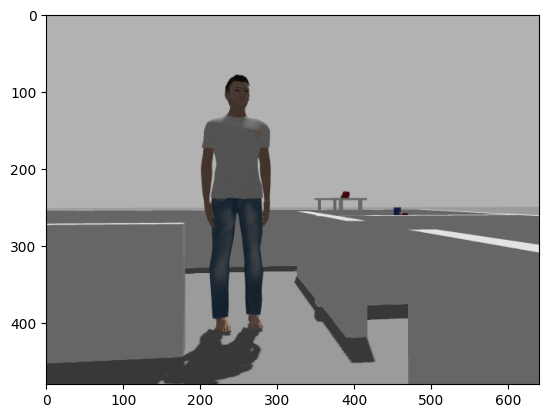

         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp


In [75]:
img=rgbd.get_image()

plt.imshow(img)

In [59]:
prompt_msg = String()
prompt_msg.data = ' white shirt'

response = classify_client_dino(ros_image, prompt_msg)

In [60]:
debug_image = bridge.imgmsg_to_cv2(response.image, desired_encoding="bgr8")

In [61]:
import matplotlib.pyplot as plt



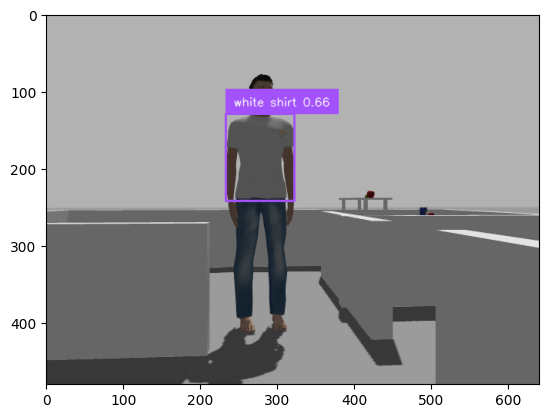

In [62]:

plt.imshow(debug_image)

In [26]:
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image



In [63]:
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")


preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

In [64]:
pil_image = Image.fromarray(img)

In [65]:
# Generate caption
inputs = processor(images=pil_image, return_tensors="pt")
out = model.generate(**inputs)
caption = processor.decode(out[0], skip_special_tokens=True)

print("Caption:", caption)

         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
/home/roboworks/.local/lib/python3.8/site-packages/transformers/generation/utils.py:1375: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Caption: a man standing in a room with a light on


         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/r

         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp


Answer: is someone wearing a dark shirt?


         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp


In [68]:
from transformers import BlipProcessor, BlipForQuestionAnswering

processor = BlipProcessor.from_pretrained("Salesforce/blip-vqa-base")
model = BlipForQuestionAnswering.from_pretrained("Salesforce/blip-vqa-base")


preprocessor_config.json:   0%|          | 0.00/445 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.54G [00:00<?, ?B/s]

         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp


In [73]:
# Ask your question
question = "how many people are wearing shorts?"
# Run inference
inputs = processor(images=pil_image, text=question, return_tensors="pt")
out = model.generate(**inputs)
answer = processor.decode(out[0], skip_special_tokens=True)

print("Answer:", answer)


         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp


Answer: 0
